# Redes neuronales - PyTorch


Este código implementa, entrena y evalúa una red neuronal totalmente conectada (fully connected) para clasificar imágenes del conjunto de datos MNIST, que contiene imágenes de dígitos manuscritos. Se entrena el modelo utilizando PyTorch, se mide el rendimiento en términos de pérdida y precisión, y se guarda el modelo para su reutilización futura.

In [1]:
import torch
# Base class for all neural network modules.
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


## Modelo

Este bloque define una red neuronal totalmente conectada con tres capas densas (fc1, fc2, fc3) y funciones de activación ReLU entre ellas. Las imágenes de entrada se aplanan con nn.Flatten, lo que permite que las capas lineales procesen vectores de características. El modelo está diseñado para recibir imágenes de tamaño 28x28 y clasificar en 10 categorías (dígitos del 0 al 9).

In [2]:
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size):
        super(FullyConnectedNN, self).__init__()
        #Defino las capas que voy a utilizar en mi modulo.
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size[0]*input_size[1], 128) # Input size: 28*28, Output Size: 128
        self.relu = nn.ReLU() # Activation Function!!! 
        self.fc2 = nn.Linear(self.fc1.out_features, 64) #Input Size: 128, Output Size: 64
        self.fc3 = nn.Linear(self.fc2.out_features, 10) #Input size: 64, Output Size: 10 (Clases de MNIST)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

## Hyper-parameters

In [3]:
# Define training parameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

## Download dataset

Aquí se descarga el conjunto de datos MNIST, transformando las imágenes en tensores normalizados a un rango de [-1, 1]. Los DataLoader preparan el conjunto de entrenamiento y prueba para que el modelo procese datos por lotes de tamaño batch_size.

In [4]:
# Download and load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# Data loader. Combines a dataset and a sampler, and provides an iterable over
# the given dataset.
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
# Data loader. Combines a dataset and a sampler, and provides an iterable over
# the given dataset.
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:05<00:00, 1.67MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 359kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.52MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 3.41MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



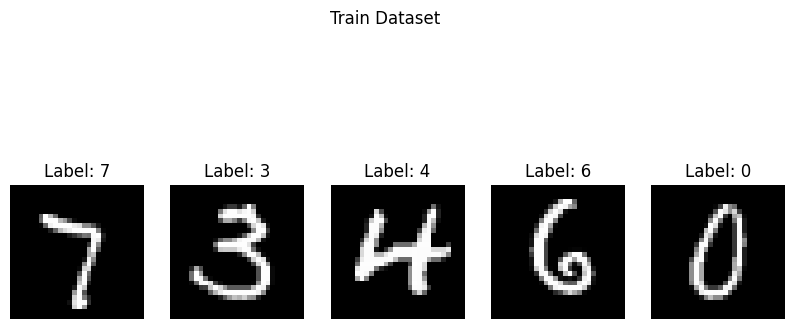

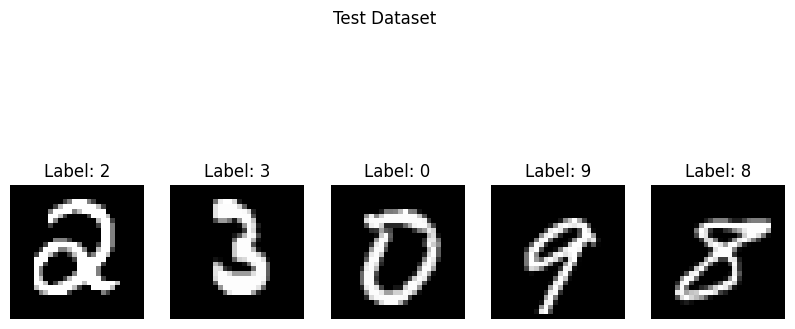

In [5]:
def show_raw_images(data_loader, title="Dataset"):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    fig, axes = plt.subplots(1, 5, figsize=(10, 5))
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].numpy().squeeze(), cmap='gray') 
        ax.set_title(f'Label: {labels[i].item()}')
        ax.axis('off')  

    plt.suptitle(title)
    plt.show()

show_raw_images(train_loader, "Train Dataset")
show_raw_images(test_loader, "Test Dataset")

## Initialize Model

Se crea una instancia del modelo, definiendo:

- criterion: Función de pérdida utilizada para medir el error (CrossEntropy para clasificación multiclase).
- optimizer: Algoritmo de optimización (Adam) que ajusta los parámetros del modelo.

In [6]:
# Initialize the model, loss function, and optimizer
model = FullyConnectedNN(input_size=(28, 28))

# Print the parameters of the model
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


Layer: fc1.weight | Size: torch.Size([128, 784]) | Values : tensor([[-0.0083,  0.0219,  0.0042,  ...,  0.0187, -0.0050,  0.0016],
        [ 0.0291, -0.0350, -0.0180,  ...,  0.0164, -0.0265,  0.0206]],
       grad_fn=<SliceBackward0>)
Layer: fc1.bias | Size: torch.Size([128]) | Values : tensor([-0.0305, -0.0059], grad_fn=<SliceBackward0>)
Layer: fc2.weight | Size: torch.Size([64, 128]) | Values : tensor([[ 7.8280e-02, -6.2282e-02, -4.9971e-02,  3.1402e-02,  3.2019e-02,
         -4.6774e-02,  4.3701e-02,  2.3671e-02, -4.8764e-02,  8.1437e-02,
          6.4326e-02,  7.6314e-02, -4.6079e-02, -3.1833e-02,  6.6895e-02,
          2.7607e-02,  8.9559e-03,  5.7407e-02,  5.4070e-02, -3.5713e-02,
         -5.9750e-02, -7.1763e-03, -1.6431e-02, -7.2929e-02, -4.6714e-03,
          4.0419e-02,  6.9012e-02,  7.9497e-02,  1.7481e-02,  5.3847e-02,
          7.7964e-03,  3.8565e-03, -8.5555e-02,  3.4108e-02,  5.3193e-02,
          2.7552e-02, -3.5033e-02,  3.5301e-02, -8.6187e-02,  8.6658e-02,
         

In [7]:
def imshow(img, label, predicted_label):
    img = img / 2 + 0.5 
    np_img = img.numpy()  
    plt.imshow(np_img[0], cmap='gray')
    plt.title(f'Label: {label}, Predicted: {predicted_label}')
    plt.show()


Este bucle entrena el modelo iterando por num_epochs. Se realiza un pase hacia adelante para calcular la pérdida, seguido de un retropropagado (loss.backward()) para ajustar los parámetros. Durante el entrenamiento, se imprime el progreso en intervalos regulares.

In [8]:

# Lists to store training and validation losses
train_losses = []
test_losses = []
# Training loop
for epoch in range(num_epochs):
    model.eval()  
    test_loss = 0.0
    correct = 0
    total = 0
    # No es necesario calcular gradientes
    with torch.no_grad():
        for batch_idx, (data, targets) in enumerate(test_loader):
            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    accuracy = correct / total
    test_losses.append(avg_test_loss)
    model.train()  # Set model to training mode
    train_loss = 0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)


        #if batch_idx == 0: 
        #    predicted = torch.argmax(outputs, 1)
        #    imshow(data[0], targets[0].item(), predicted[0].item())

        # Coloca el gradiente del optimizador en zero
        # Calcula las derivadas parciales (gradientes) de cada parametro a optimizar
        # Finalmente hace la actualización de parametros.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    train_losses.append(train_loss / len(train_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2%}')


Epoch [1/10], Step [1/938], Loss: 2.3044
Epoch [1/10], Step [101/938], Loss: 0.4207
Epoch [1/10], Step [201/938], Loss: 0.3141
Epoch [1/10], Step [301/938], Loss: 0.2927
Epoch [1/10], Step [401/938], Loss: 0.2981
Epoch [1/10], Step [501/938], Loss: 0.3314
Epoch [1/10], Step [601/938], Loss: 0.2379
Epoch [1/10], Step [701/938], Loss: 0.3116
Epoch [1/10], Step [801/938], Loss: 0.4767
Epoch [1/10], Step [901/938], Loss: 0.1375
Epoch [1/10], Train Loss: 0.4003, Test Loss: 2.3089, Accuracy: 7.71%
Epoch [2/10], Step [1/938], Loss: 0.1121
Epoch [2/10], Step [101/938], Loss: 0.0973
Epoch [2/10], Step [201/938], Loss: 0.1677
Epoch [2/10], Step [301/938], Loss: 0.1930
Epoch [2/10], Step [401/938], Loss: 0.2268
Epoch [2/10], Step [501/938], Loss: 0.2782
Epoch [2/10], Step [601/938], Loss: 0.2792
Epoch [2/10], Step [701/938], Loss: 0.0957
Epoch [2/10], Step [801/938], Loss: 0.2621
Epoch [2/10], Step [901/938], Loss: 0.2355
Epoch [2/10], Train Loss: 0.1913, Test Loss: 0.2233, Accuracy: 93.45%
Epoch

In [9]:
print("train: ", train_losses)
print("test: ", test_losses)

train:  [0.4002706395672646, 0.19129432719756864, 0.13971347748430998, 0.11269019215580212, 0.09375718994232923, 0.08307248332909048, 0.07669180936327995, 0.06838051888293453, 0.06097069488508679, 0.05828319456880547]
test:  [2.308854889717831, 0.22328415664897602, 0.1642372714248812, 0.11941940425212975, 0.11362934360506048, 0.11273250505802737, 0.12280773156719982, 0.11622616444613523, 0.0987577966427739, 0.1019596389708388]


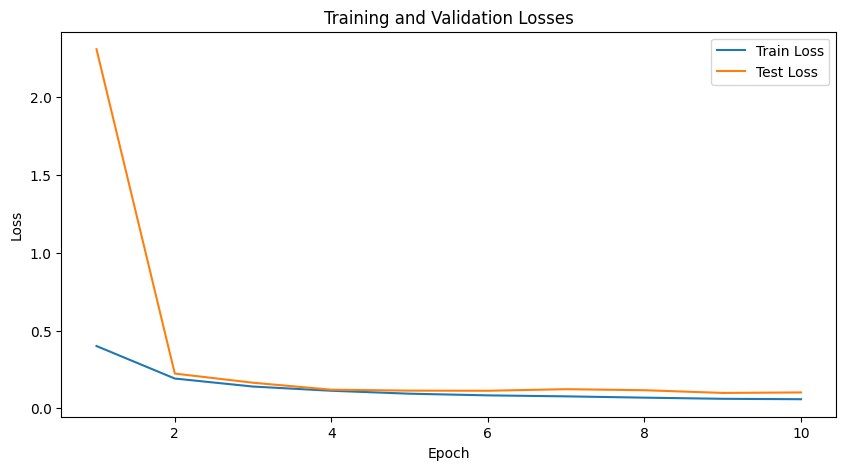

Training finished!


In [11]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

print('Training finished!')

In [12]:
# Save model state
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, 'model_checkpoint.pth')

Se evalúa el modelo en el conjunto de prueba sin calcular gradientes, midiendo la pérdida promedio (test_loss) y la precisión (accuracy), es decir, el porcentaje de predicciones correctas.



In [13]:
model = FullyConnectedNN(input_size=(28, 28))
model.eval()  
test_loss = 0.0
correct = 0
total = 0
# No es necesario calcular gradientes
with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

avg_test_loss = test_loss / len(test_loader)
accuracy = correct / total
print(f"Accuracy: {accuracy}")

Accuracy: 0.0984


Se guarda el estado del modelo, el optimizador y otros datos clave en un archivo para su reutilización.

In [14]:
# Load saved model parameters
checkpoint = torch.load('model_checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

C:\Users\PC MASTER\AppData\Local\Temp\ipykernel_27032\3239434223.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('model_checkpoint.pth')


In [15]:
model.eval()  
test_loss = 0.0
correct = 0
total = 0
# No es necesario calcular gradientes
with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
        outputs = model(data)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

avg_test_loss = test_loss / len(test_loader)
accuracy = correct / total
print(f"Accuracy: {accuracy}")

Accuracy: 0.9725
